In [9]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.special import gamma

In [ ]:
# https://artmenlope.github.io/plotting-complex-variable-functions/

Text(0.5, 0.92, '$|f(z)|=|\\dfrac{1}{z^2-4}|$')

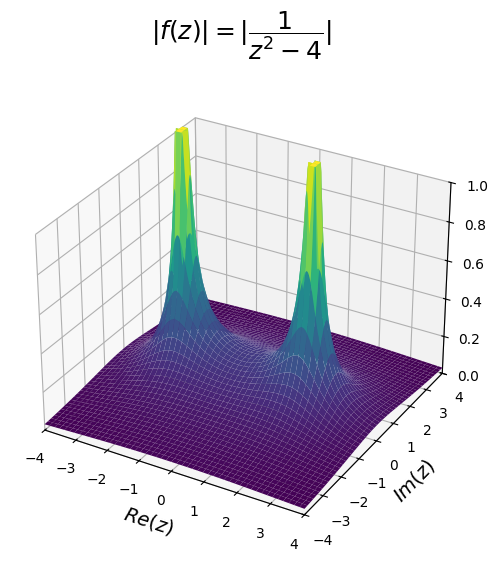

In [8]:
N = 500
lim = 4

x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = abs(1/(z**2-4))
f[f>1.3] = 1.3 # Cut the function at the poles for decoration purposes.

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,1))

ax.plot_surface(x, y, f, cmap="viridis", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=14)
ax.set_ylabel("$Im(z)$", size=14)
ax.set_title("$|f(z)|=|\dfrac{1}{z^2-4}|$", size=18, pad=30)


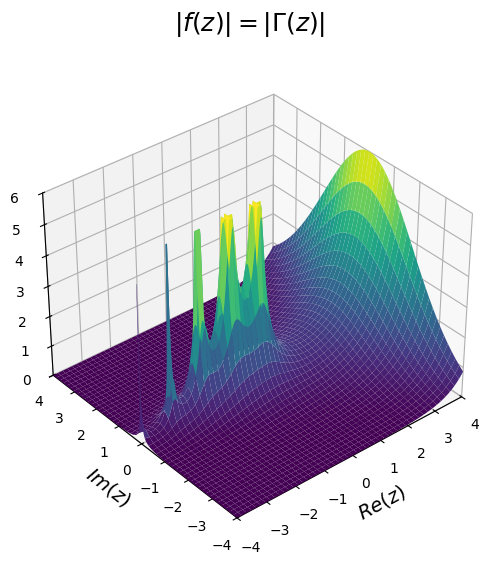

In [10]:
f = abs(gamma(z))
f[f>6] = 6

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,6))

ax.plot_surface(x, y, f, cmap="viridis", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=14)
ax.set_ylabel("$Im(z)$", size=14)
ax.set_title("$|f(z)|=|\Gamma (z)|$", size=18, pad=30)
ax.view_init(azim=-130, elev=35)

Text(0.5, 0.92, '$Im \\,\\, f(z)$')

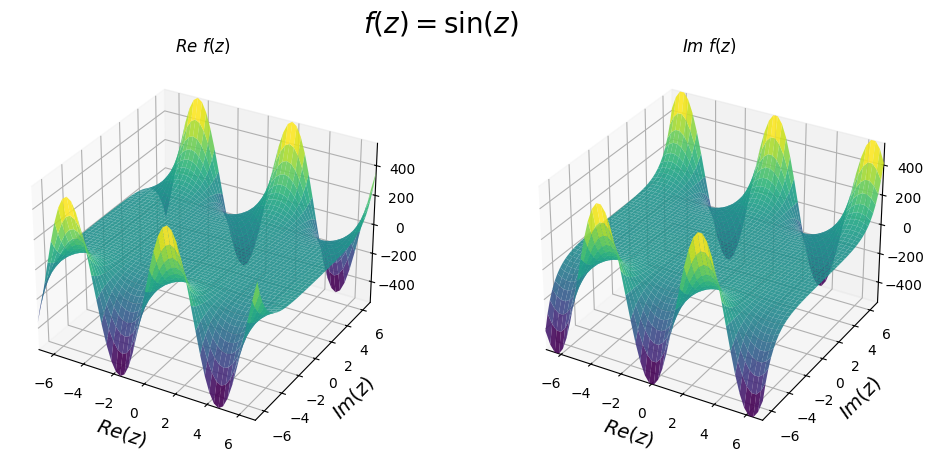

In [11]:
N = 50
lim = 7

x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = np.sin(z)

fig = plt.figure(figsize=(12,5))
fig.suptitle("$f(z) = \sin(z)$", fontsize=20)
ax1 = fig.add_subplot(121, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim))
ax2 = fig.add_subplot(122, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim))

ax1.plot_surface(x, y, f.real, cmap="viridis", shade=True, alpha=0.9, label="Re f(z)")
ax2.plot_surface(x, y, f.imag, cmap="viridis", shade=True, alpha=0.9, label="Im f(z)")

ax1.set_zlim(f.real.min(), f.real.max())
ax1.set_xlabel("$Re(z)$", fontsize=14)
ax1.set_ylabel("$Im(z)$", fontsize=14)
ax1.set_title("$Re \,\, f(z)$") # \, adds space

ax2.set_zlim(f.imag.min(), f.imag.max())
ax2.set_xlabel("$Re(z)$", fontsize=14)
ax2.set_ylabel("$Im(z)$", fontsize=14)
ax2.set_title("$Im \,\, f(z)$")